In [480]:
import sys
sys.path.append("..")

In [481]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from pyFDA import bspline, gaussNewton
from pyFDA.register import localRegression

In [154]:
reload(gaussNewton)
reload(localRegression)

<module 'pyFDA.register.localRegression' from '../pyFDA/register/localRegression.py'>

In [482]:
%matplotlib inline

In [483]:
def gFunction(t,theta):
	return np.exp(theta[0]) *(t+theta[1])

# Example 1 

In [603]:
n = 200
t = np.linspace(0,6,n)

theta1points = .01*((t-3)**2 - 9)
theta1 = bspline.Bspline(t,theta1points)
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)

x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

## $h^{-1} \approx t(h(t))$ :

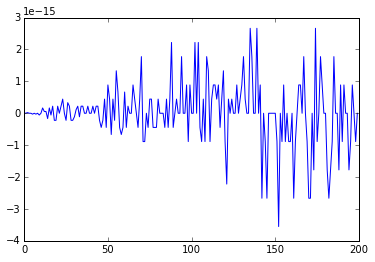

In [540]:
hinv = bspline.Bspline(h,t)
plt.plot(hinv(hspline(t))-t)

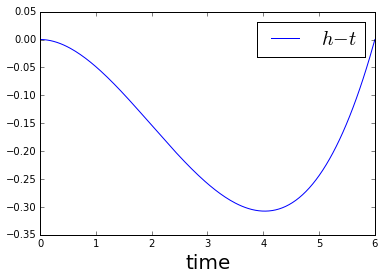

In [491]:
plt.plot(t,h-t,label="$h-t$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

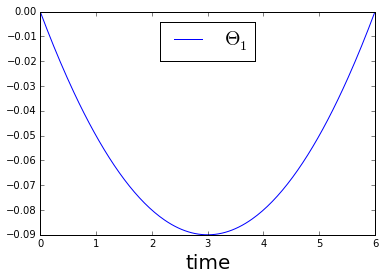

In [541]:
plt.plot(t,theta1(t),label="$\Theta_1$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

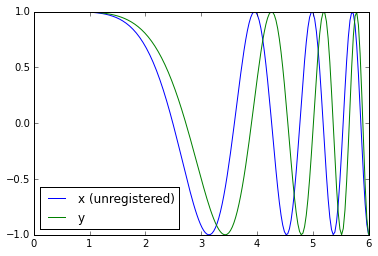

In [542]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

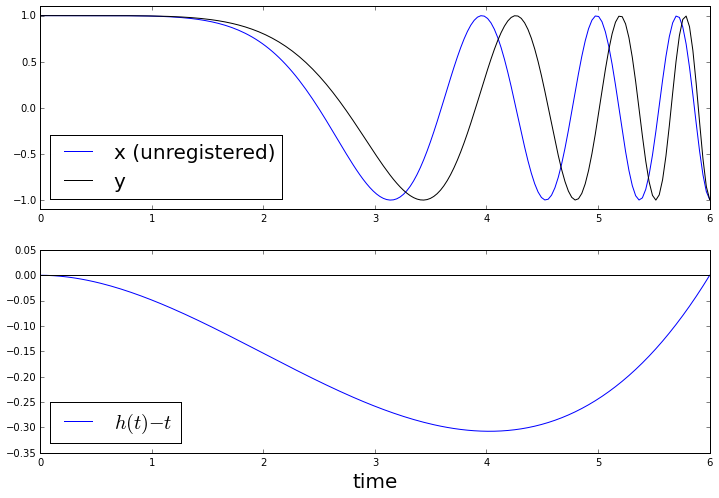

In [604]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,'k',label="y")
plt.legend(loc="best",fontsize=20)
plt.ylim(-1.1,1.1)

plt.subplot(212)
plt.plot(t,h-t,label="$h(t)-t$")
plt.legend(loc="best",fontsize=20)
plt.plot([0,6],[0,0],'k')

plt.xlabel("time",fontsize=20)

plt.savefig("figures/example1_data.png",bbox_inches="tight",dpi=300)

In [564]:
lr = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/16,decay=True)
lr.run(10)

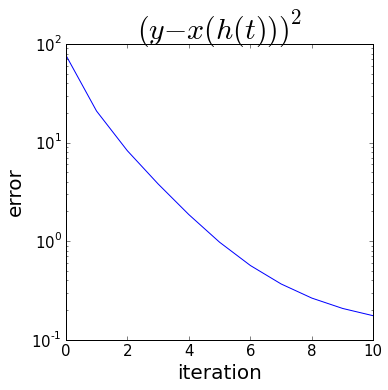

In [565]:
plt.figure(figsize=(8,8))

plt.semilogy(lr.error,)
plt.title("$(y - x(h(t)))^2$",fontsize=30)
plt.ylabel("error",fontsize=20)
plt.xlabel("iteration",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout(pad=10)

plt.savefig("figures/example1_error.png",bbox_inches="tight",dpi=300)

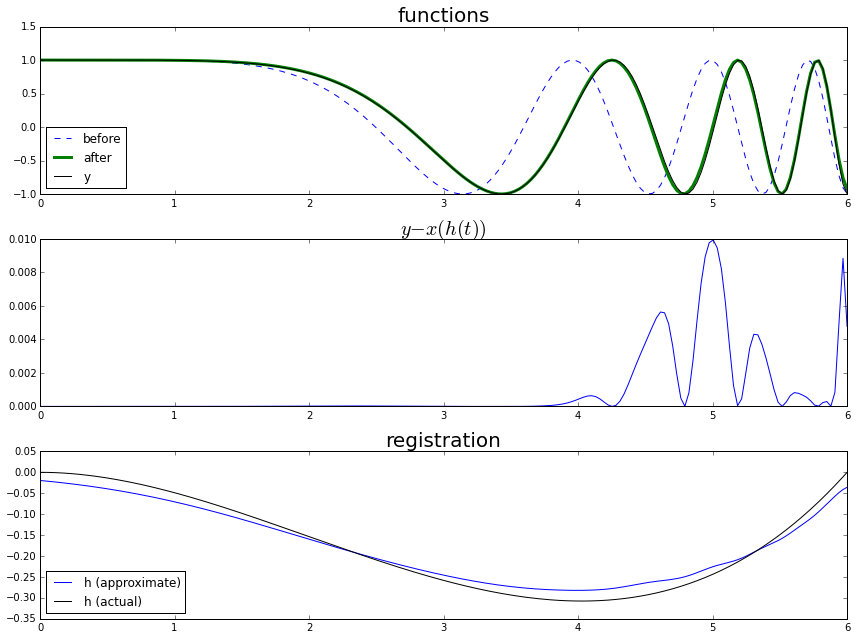

In [570]:
plt.figure(figsize=(12,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr.xhats[0](t),'b--',label='before');
plt.plot(t,lr.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("figures/example1_fit.png",bbox_inches="tight",dpi=300)

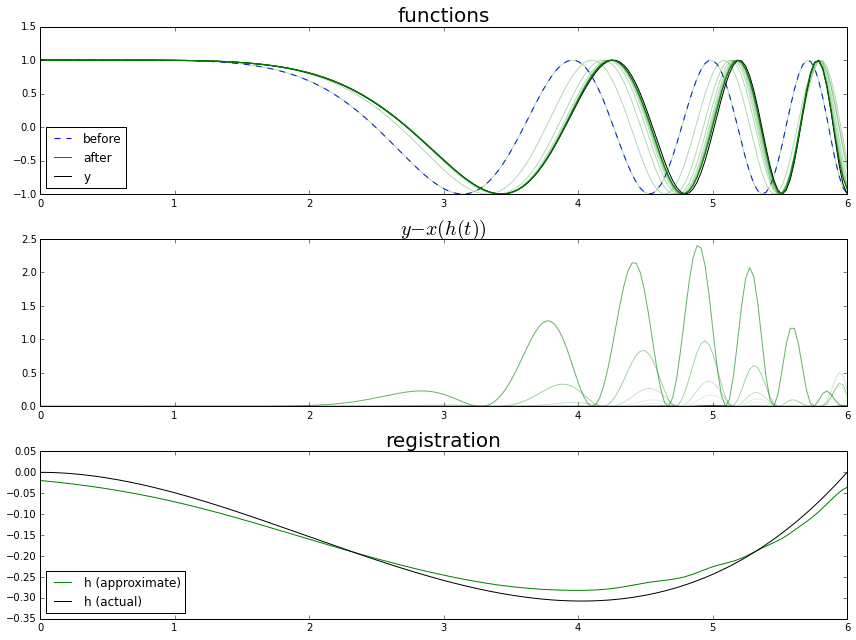

In [589]:
plt.figure(figsize=(12,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr.xhats[0](t),'b--',label='before');
plt.plot(t,lr.xhats[-1](t),'g',label='after',linewidth=1);
plt.plot(t,y,'k',linewidth=1,label='y');
for i in range(len(lr.xhats)):
    plt.plot(t,lr.xhats[i](t),'g',alpha=.3);
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr.xspline(t)-y)**2);
for i in range(len(lr.xhats)):
    plt.plot(t,(lr.xhats[i](t)-y)**2,'g',alpha=(.6**(i+1)));

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr.h()(t)-t,'g',label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("figures/example1_fit2.png",bbox_inches="tight",dpi=300)

# Example 2 

In [608]:
n = 200
t = np.linspace(0,6,n)

theta1points = np.array([(0,0),(2,-.1),(4,.01),(6,0)])
theta1 = bspline.Bspline(theta1points[:,0],theta1points[:,1])
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)

x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

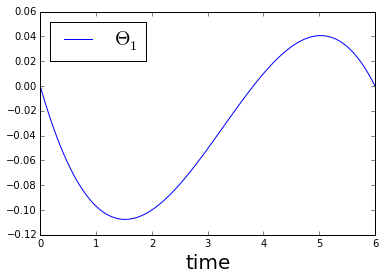

In [591]:
plt.plot(t,theta1(t),label="$\Theta_1$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

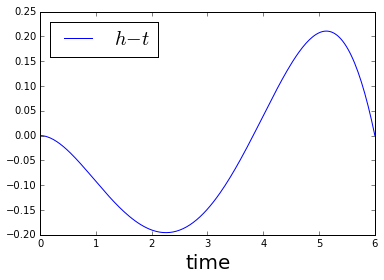

In [592]:
plt.plot(t,h-t,label="$h-t$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

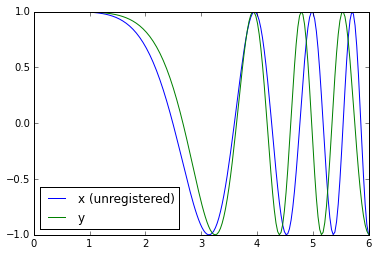

In [593]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

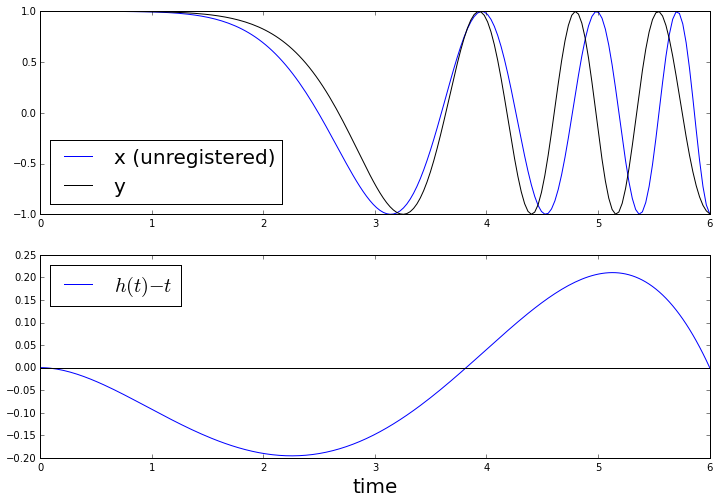

In [594]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,'k',label="y")
plt.legend(loc="best",fontsize=20)

plt.subplot(212)
plt.plot(t,h-t,label="$h(t)-t$")
plt.legend(loc="best",fontsize=20)
plt.plot([0,6],[0,0],'k')

plt.xlabel("time",fontsize=20)

plt.savefig("figures/example2_data.png",bbox_inches="tight",dpi=300)

In [595]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/16,decay=True)
lr2.run(10)

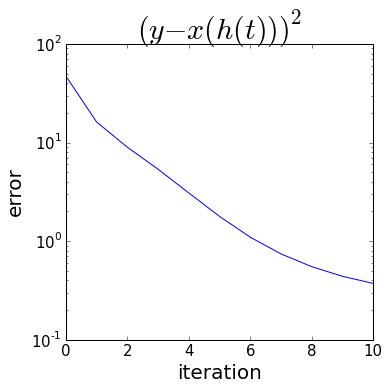

In [596]:
plt.figure(figsize=(8,8))

plt.semilogy(lr2.error,)
plt.title("$(y - x(h(t)))^2$",fontsize=30)
plt.ylabel("error",fontsize=20)
plt.xlabel("iteration",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout(pad=10)

plt.savefig("figures/example2_error.png",bbox_inches="tight",dpi=300)

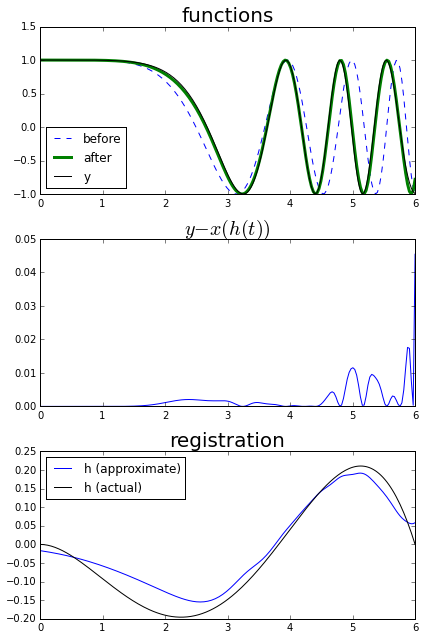

In [597]:
plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

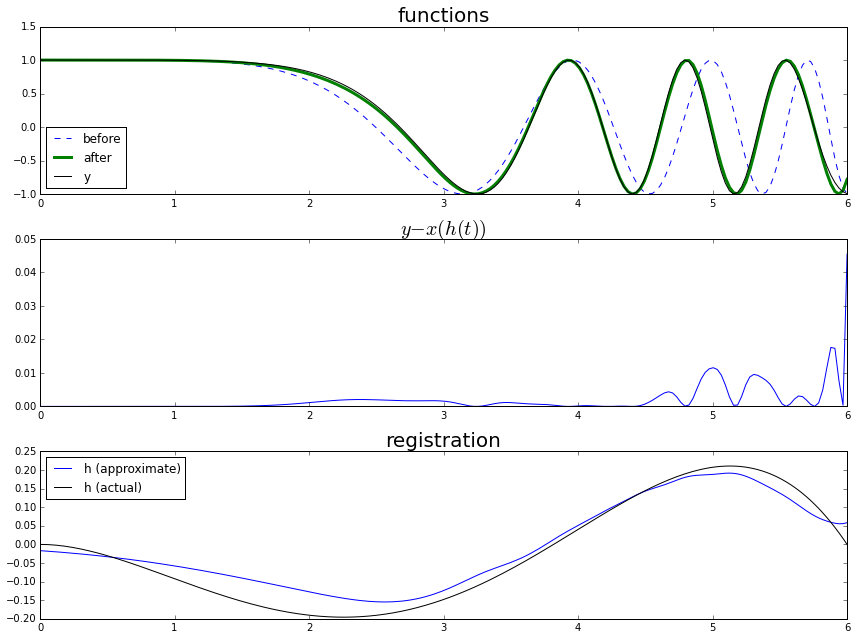

In [598]:
plt.figure(figsize=(12,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("figures/example2_fit.png",bbox_inches="tight",dpi=300)

## Vary the hyperparameters 

In [599]:
lr_lowBandwidth = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/2,ridge=n/16,decay=True)
lr_lowBandwidth.run(10)

In [601]:
lr_highBandwidth = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi*4,ridge=n/16,decay=True)
lr_highBandwidth.run(10)

In [600]:
lr_highPenalty = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n,decay=True)
lr_highPenalty.run(10)

In [602]:
lr_lowPenalty = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/1024,decay=True)
lr_lowPenalty.run(10)

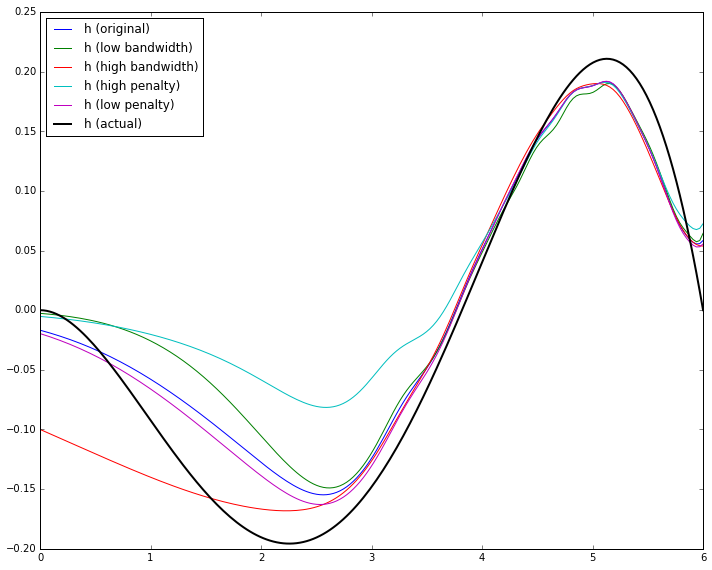

In [611]:
plt.figure(figsize=(10,8))
plt.plot(t,lr2.h()(t)-t,label="h (original)")
plt.plot(t,lr_lowBandwidth.h()(t)-t,label="h (low bandwidth)")
plt.plot(t,lr_highBandwidth.h()(t)-t,label="h (high bandwidth)")
plt.plot(t,lr_highPenalty.h()(t)-t,label="h (high penalty)")
plt.plot(t,lr_lowPenalty.h()(t)-t,label="h (low penalty)")
plt.plot(t,h-t,'k',label="h (actual)",linewidth=2)
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("figures/example2_hyperparams.png",bbox_inches="tight",dpi=300)

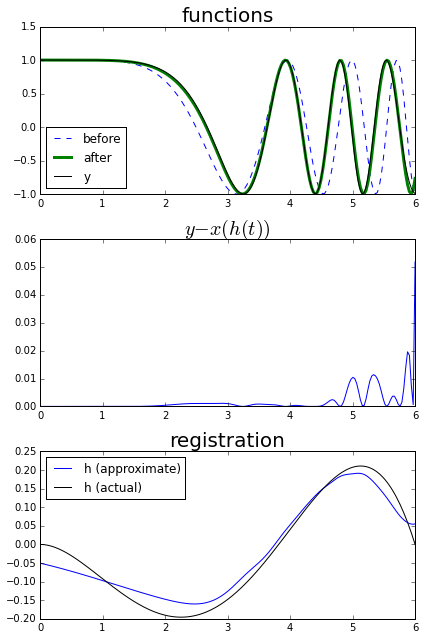

In [527]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi*2,ridge=n/16,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

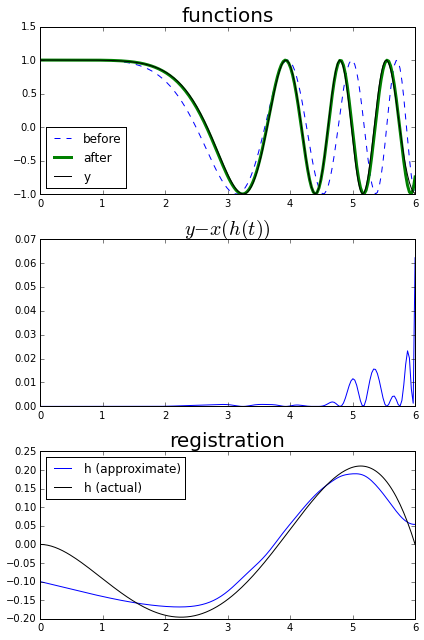

In [528]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi*4,ridge=n/16,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

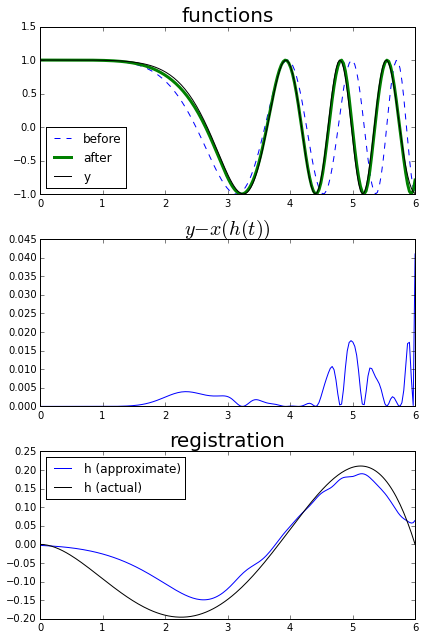

In [530]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/2,ridge=n/16,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

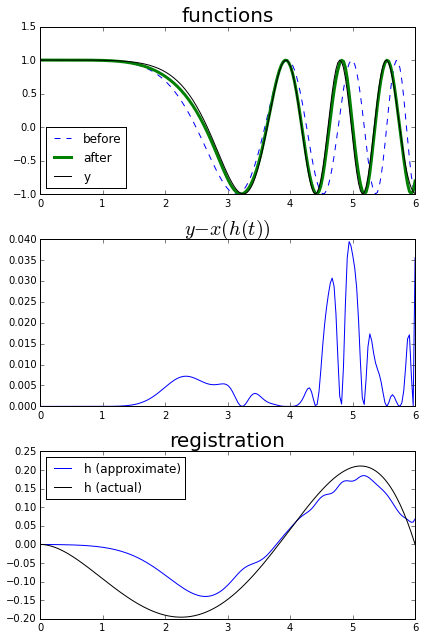

In [531]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/4,ridge=n/16,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

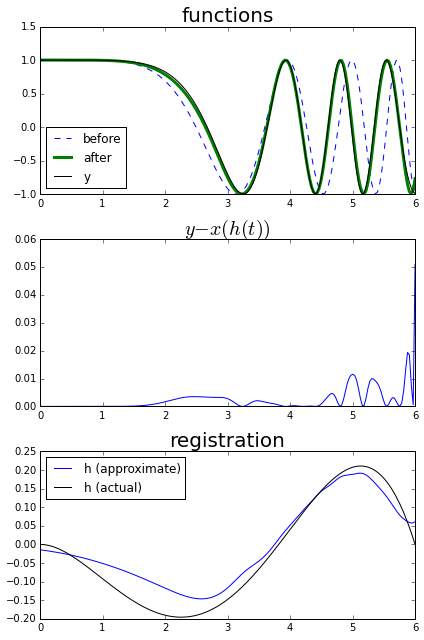

In [532]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/8,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

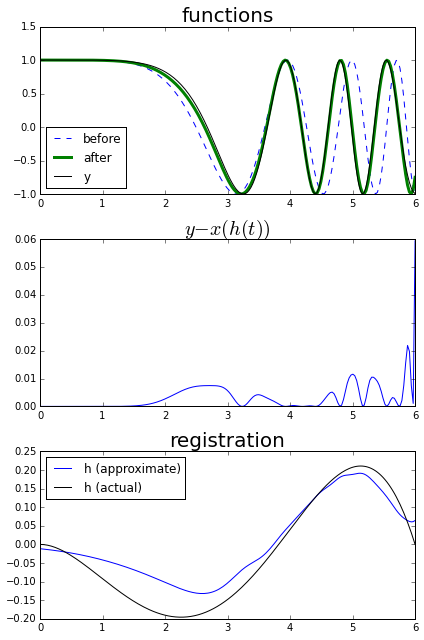

In [533]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/4,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

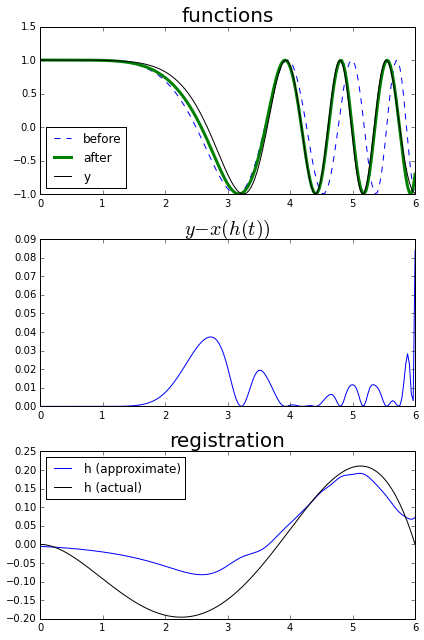

In [534]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

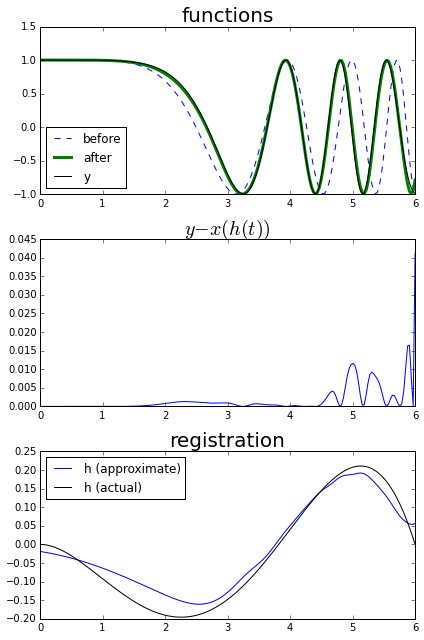

In [535]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/64,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

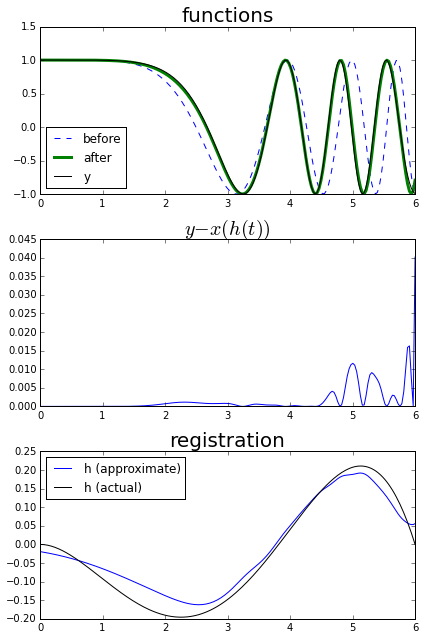

In [536]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/128,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

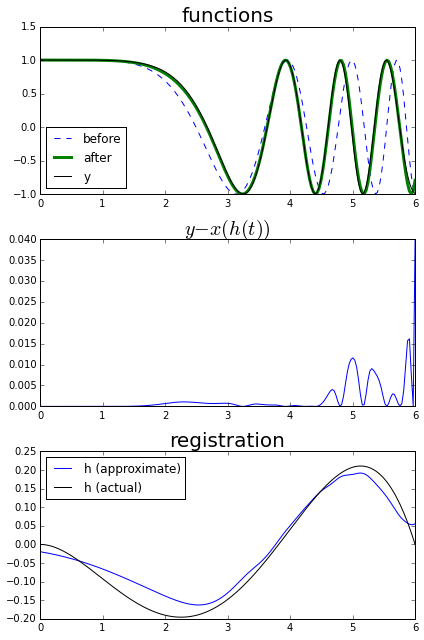

In [537]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/256,decay=True)
lr2.run(10)

plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()